# Diabetes Prediction Model

## Data Description

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset, diabetes _ 012 _ health _ indicators _ BRFSS2015.csv, is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. There is class imbalance in this dataset. This dataset has 21 feature variables 
- 0 is for No Diabetes or only during pregnancy
- 1 is for Prediabetes, and 
- 2 is for Diabetes. 

**Features - Important Risk Factors**


Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease (not in strict order of importance):

- Blood Pressure (high)
- Cholesterol (high)
- Smoking
- Diabetes
- Obesity
- Age
- Sex
- Race
- Diet
- Exercise
- Alcohol Consumption
- BMI
- Household Income
- Marital Status
- Sleep
- Time since last checkup
- Education
- Health Care Coverage
- Mental Health

Here, Diabetes_012 is our target variable and we will try to predict whether a person has diabetes or not based on the 21 features using bagging, specifically the Random Forest algorithm, which is an ensemble method based on bagging.

.


## Importing Libraries and Reading Data

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data=pd.read_csv("C:/Users/rishu/OneDrive/Desktop/Divyanshi/MSc DA/Machine Learning/Diabetes Prediction Model/diabetes_012_health_indicators_BRFSS2015.csv")
data.head(3)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


## Data Exploration and Visualization

In [24]:
# Explore the dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null 

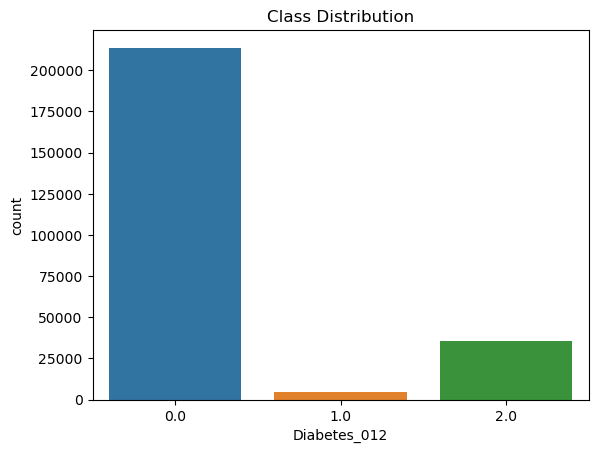

In [10]:
# Visualize class distribution
sns.countplot(x='Diabetes_012', data=data)
plt.title("Class Distribution")
plt.show()

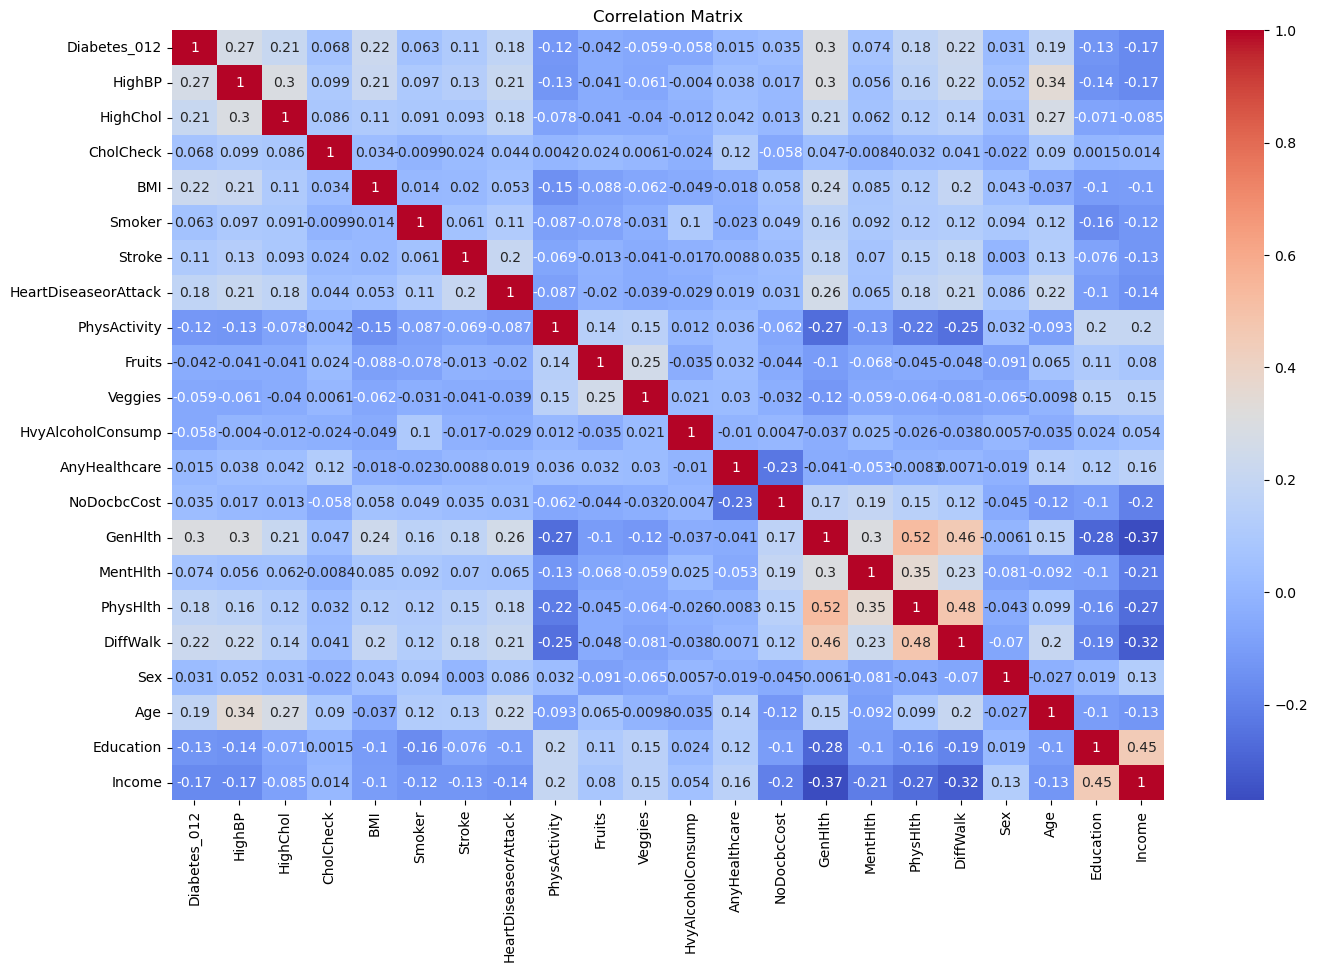

In [13]:
# Visualize correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Feature Selection

In [14]:
# Feature Selection
features = data.drop('Diabetes_012', axis=1)
labels = data['Diabetes_012']

In [15]:
# Perform feature selection using Random Forest feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(features, labels)

feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': rf_classifier.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
selected_features = feature_importances[feature_importances['Importance'] > 0.02]['Feature'].tolist()

X_selected = features[selected_features]

## Split into Train, Test and Validation Sets

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 42)

In [17]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## Hyperparameter Tuning using Grid Search

In [18]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


## Training and Prediction

In [20]:
# Train the Random Forest Classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(random_state=42, **best_params)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
rf_predictions = rf_classifier.predict(X_val)

## Model Evaluation

In [21]:
# Evaluate the Random Forest Classifier on the validation set
rf_accuracy = accuracy_score(y_val, rf_predictions)
print("\nRandom Forest Classifier Accuracy on Validation Set:", rf_accuracy)
print("Classification Report on Validation Set:\n", classification_report(y_val, rf_predictions))
print("Confusion Matrix on Validation Set:\n", confusion_matrix(y_val, rf_predictions))


Random Forest Classifier Accuracy on Validation Set: 0.847839798170924
Classification Report on Validation Set:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42704
         1.0       0.00      0.00      0.00       941
         2.0       0.56      0.16      0.25      7091

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

Confusion Matrix on Validation Set:
 [[41884     0   820]
 [  857     0    84]
 [ 5959     0  1132]]


C:\Users\rishu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Exporting as .pkl file

In [22]:
# Export the trained model as a .pkl file
model_filename = 'Diabetes_Prediction_Model.pkl'
joblib.dump(rf_classifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as Diabetes_Prediction_Model.pkl


# Conclusion

In this notebook, we have learnt about the ensemble models namely Boosting, Bagging and Stacking. We have built a Bagging model using the Diabetes dataset and evaluated the accuracy, precision and recall of the model. From the above, we can conclude that:

1. **Accuracy**: The accuracy of the classifier on the validation set is approximately 0.848 or **84.8%**. This metric measures the overall correctness of the classifier's predictions.

2. **Classification Report**: The classification report provides additional metrics such as precision, recall, and F1-score for each class. Here's a breakdown:

   - For Class 0 (Non-diabetic): 
     - Precision is approximately 0.86, which means that among the instances predicted as class 0, **86% are actually class 0.**
     - Recall is approximately 0.98, which means that among all the actual class 0.0 instances, **98% are correctly predicted as class 0.**
     - **F1-score is approximately 0.92**, which is the harmonic mean of precision and recall.

   - For Class 1 (Pre-diabetic):
     - Precision is 0.0, which means that **no instances are correctly predicted as class 1.** This might indicate an issue with class imbalance or data quality.
     - Recall is 0.0, indicating that **none of the actual class 1.0 instances are correctly predicted.**
     - **F1-score is 0.0 due to the lack of correct predictions for class 1.0.**

   - For class 2.0 (Diabetec):
     - Precision is approximately 0.56, indicating that **56% of the instances predicted as Class 2 are actually Class 2.**
     - Recall is approximately 0.16, indicating that **only 16% of the actual class 2 instances are correctly predicted.**
     - **F1-score is approximately 0.25.**

3. **Confusion Matrix**: The confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives for each class. It allows you to see how the classifier's predictions match with the actual classes.

   - For Class 0: There are 41,884 true positives (correctly predicted), 0 false positives, and 820 false negatives.
   - For Class 1: There are 0 true positives, 0 false positives, and 941 false negatives.
   - For Class 2: There are 1,132 true positives, 0 false positives, and 5,959 false negatives.

The "UndefinedMetricWarning" indicates that precision and F1-score are ill-defined for Class 1 because there are no predicted samples for this class, likely due to a lack of Class 1 instances in the validation set or an issue with class imbalance.

Overall, the model appears to perform well for Class 0 but struggles with Class 1, possibly due to data imbalance or data quality issues for that class. Further analysis and data preprocessing may be needed to improve performance on Class 1.